## No Noise Data

In [243]:
import numpy as np

In [244]:
x = 1/5 * np.array([[-1.23374131], [-2.80075168], [-3.44975161], [-3.21186531], [-3.02209586], [-2.21373764], [-4.37775872],
            [-1.86404408], [-1.69559337], [-1.37603453], [ 3.72937   ], [ 4.88684951], [ 2.23649116], [ 2.69073348],
            [ 1.29613003], [ 3.95513359], [ 3.83697005], [ 1.45216711], [ 4.42576355], [ 2.07597818]])
y = np.array([[-0.82561576], [ 0.13909248], [-0.35538609], [-0.14406367], [ 0.01778433], [-0.10945013], [-0.09371143], 
               [-0.51694635], [-0.69063383], [-0.85017552], [-0.38183306], [ 0.05665405], [ 0.69515332], [ 0.82659226], 
               [-0.15542848], [-0.50786486], [-0.45959419], [-0.10377496], [-0.33795626], [ 0.53172738]])

## Noisy Data

In [245]:
xn = 1/5 * np.array([[-1.23374131], [-2.80075168], [-3.44975161], [-3.21186531], [-3.02209586], [-2.21373764], [-4.37775872],
            [-1.86404408], [-1.69559337], [-1.37603453], [ 3.72937   ], [ 4.88684951], [ 2.23649116], [ 2.69073348],
            [ 1.29613003], [ 3.95513359], [ 3.83697005], [ 1.45216711], [ 4.42576355], [ 2.07597818]])
yn = np.array([-0.8181956697783953, 0.13885402687227927, -0.3862388281350327, -0.20234915578844812, 
    0.03000639994622538, -0.06849287803937654, -0.07642553448272046, -0.5232257730716847, 
        -0.7023192220709934, -0.8190169865472378, -0.3285415162946372, 0.05488363929789496, 
            0.6563808735923208, 0.6941414577967285, -0.08382934737250632, -0.47515928440184424, 
                -0.5146741885584126, -0.11555280503711199, -0.31140762228445024, 0.4945424732107972]).reshape((-1, 1))

GPT Solution

/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/3811602421.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = kernel(X[i], X[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/3811602421.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star[i, j] = kernel(X[i], X_pred[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/3811602421.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star_star[i,

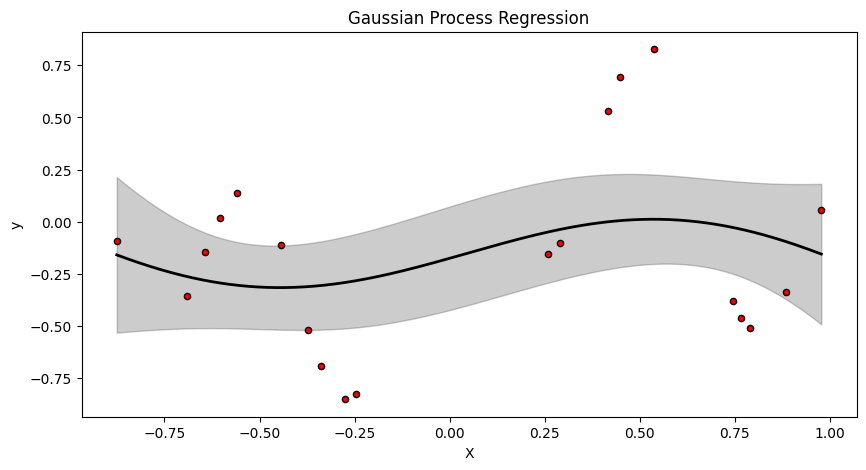

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# Define the kernel function (Radial Basis Function, or RBF)
def rbf_kernel(x1, x2, length_scale, amplitude):
    return amplitude ** 2 * np.exp(-0.5 * ((x1 - x2) / length_scale) ** 2)

# Gaussian process regression function
def gaussian_process_regression(X, y, X_pred, kernel, noise_variance):
    n = len(X)
    
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j])
    
    L = np.linalg.cholesky(K + noise_variance * np.eye(n))
    
    K_star = np.zeros((n, len(X_pred)))
    for i in range(n):
        for j in range(len(X_pred)):
            K_star[i, j] = kernel(X[i], X_pred[j])
    
    K_star_star = np.zeros((len(X_pred), len(X_pred)))
    for i in range(len(X_pred)):
        for j in range(len(X_pred)):
            K_star_star[i, j] = kernel(X_pred[i], X_pred[j])
    
    Lk = np.linalg.solve(L, K_star)
    mu = np.dot(Lk.T, np.linalg.solve(L, y))
    
    # v = np.linalg.solve(L, K_star_star)
    covariance = K_star_star - np.dot(Lk.T, Lk)
    
    return mu, covariance


# Define hyperparameters
length_scale = 1.0
amplitude = 1.0
noise_variance = 0.1

# Define the points for prediction
X_pred = np.linspace(np.min(x), np.max(x), 1000).reshape(-1, 1)

# Perform Gaussian process regression
mu, cov = gaussian_process_regression(x, y, X_pred, lambda x, y: rbf_kernel(x, y, length_scale, amplitude), noise_variance)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, c='r', s=20, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_pred, mu, 'k', lw=2)
std_dev = np.sqrt(np.diag(cov)).reshape(-1, 1)
plt.fill_between((X_pred[:, 0]).flat, (mu - 1.96 * std_dev).flat, (mu + 1.96 * std_dev).flat, alpha=0.2, color='k')
plt.title("Gaussian Process Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


Modified Solution

In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Define the kernel function (Radial Basis Function, or RBF)
def rbf_kernel(x1, x2, length_scale, amplitude):
    return amplitude ** 2 * np.exp(-0.5 * ((x1 - x2) / length_scale) ** 2)


def gaussian_process_regression(X, y, X_pred, kernel, noise_variance):
    n = len(X)
    n_test = len(X_pred)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j])
    
    L = np.linalg.cholesky(K + noise_variance * np.eye(n))
    
    K_star = np.zeros((n, n_test))
    for i in range(n):
        for j in range(n_test):
            K_star[i, j] = kernel(X[i], X_pred[j])
    
    K_star_star = np.zeros((n_test, n_test))
    for i in range(len(X_pred)):
        for j in range(n_test):
            K_star_star[i, j] = kernel(X_pred[i], X_pred[j])
    
    Lk = np.linalg.solve(L, K_star)
    mu = np.dot(Lk.T, np.linalg.solve(L, y))
    
    # MODIFICATION
    variance = np.diag(K_star_star) - np.sum(Lk**2, axis=0)
    variance = variance.reshape(-1,1)

    # ADDITION
    L_star_star = np.linalg.cholesky(K_star_star + 1e-6*np.eye(n_test) - np.dot(Lk.T, Lk))

    # sampling from the posterior (ADDITION)
    f_post = mu.reshape(-1,1) + np.dot(L_star_star, np.random.normal(size=(n_test,5)))  # size=(n, m), m shown how many posterior  
    
    return mu, variance, f_post



In [248]:
# Define hyperparameters
length_scale = 0.1
amplitude = 4
# noise_variance = 0.1 # MODIFICATION

# Define the points for prediction
X_pred = np.linspace(np.min(x), np.max(x), 1000).reshape(-1, 1)

# Perform Gaussian process regression
mu, cov, f_post = gaussian_process_regression(x, y, X_pred, lambda x, y: rbf_kernel(x, y, length_scale, amplitude), noise_variance=0)

/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = kernel(X[i], X[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star[i, j] = kernel(X[i], X_pred[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star_star[i,

In [249]:
stddev = np.sqrt(cov)

<Figure size 640x480 with 0 Axes>

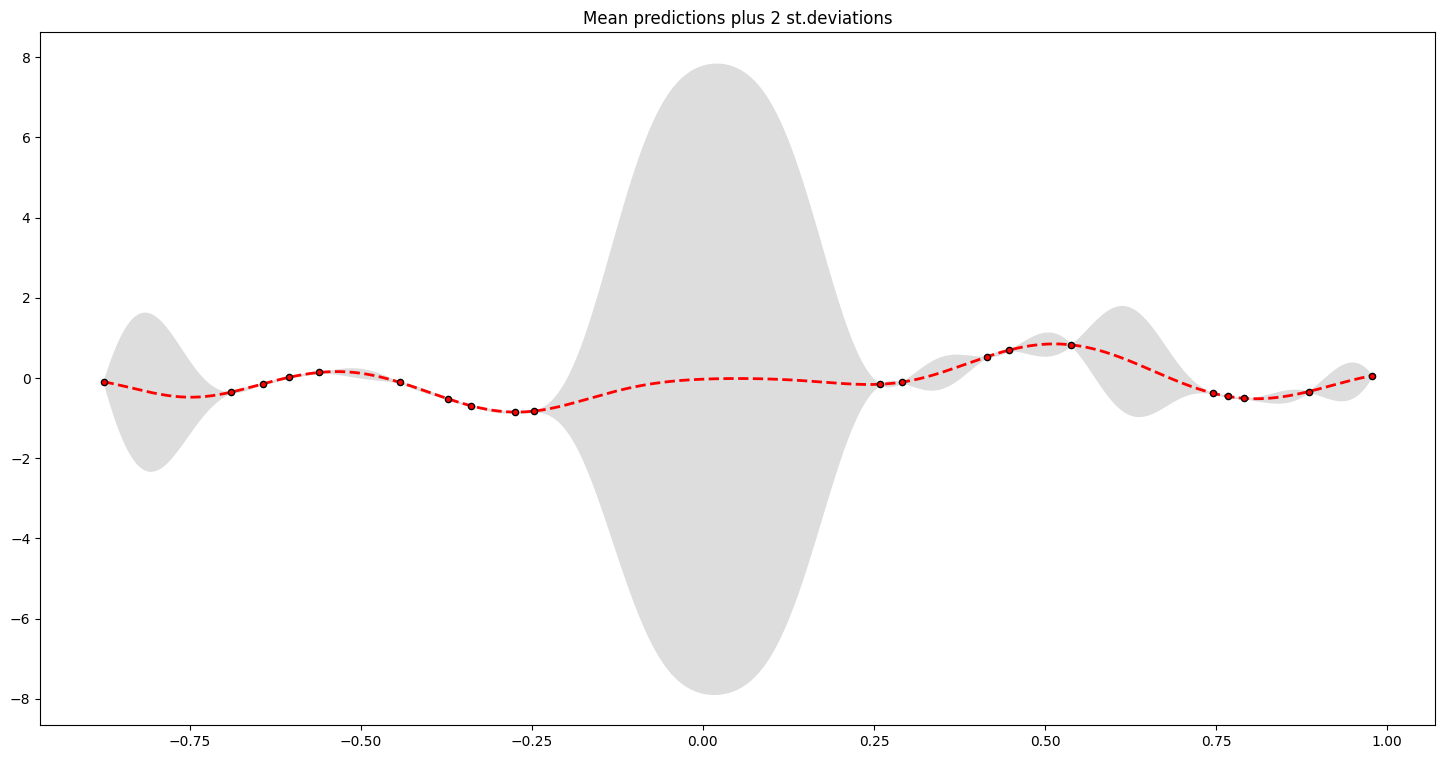

In [250]:
plt.figure(1)
plt.clf()
plt.figure(figsize=(18,9))
plt.scatter(x, y, c='r', s=20, zorder=10, edgecolors=(0, 0, 0))
plt.fill_between(X_pred.flat, (mu-2*stddev).flat, (mu+2*stddev).flat, color="#dddddd")
plt.plot(X_pred, mu, 'r--', lw=2)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()

<Figure size 640x480 with 0 Axes>

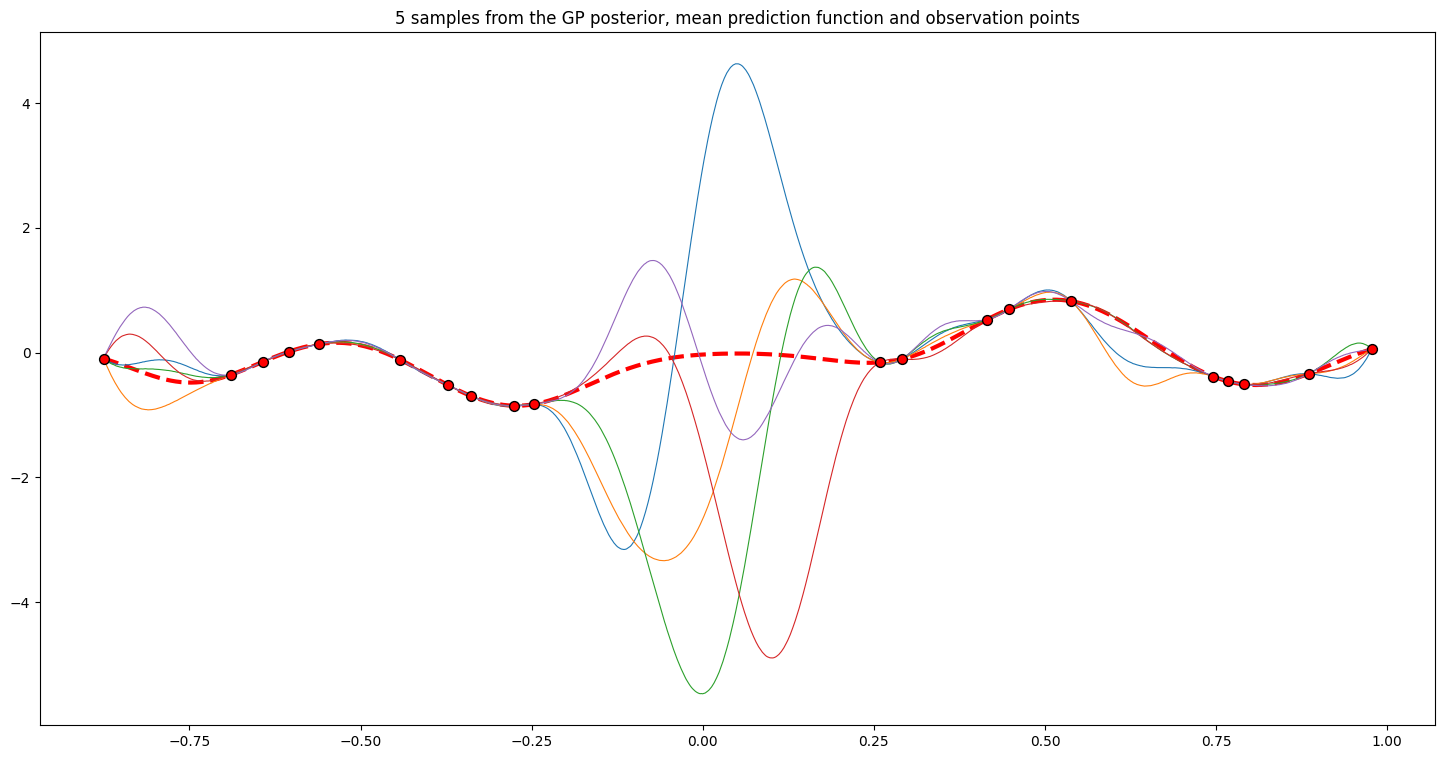

In [251]:
plt.figure(2)
plt.clf()
plt.figure(figsize=(18,9))
plt.scatter(x, y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_pred, mu, 'r--', linewidth=3)
plt.plot(X_pred, f_post, linewidth=0.8)
plt.title('5 samples from the GP posterior, mean prediction function and observation points')
plt.show()

For noisy inputs

In [252]:
# MODIFICATION (add noise)

# Perform Gaussian process regression: assume \simga_n ^2 = 0.001 (noise level of inputs)
mu_n, cov_n, f_post_n = gaussian_process_regression(xn, yn, X_pred, lambda x, y: rbf_kernel(x, y, length_scale, amplitude), noise_variance=0.001)
stddev_n = np.sqrt(cov_n)

/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = kernel(X[i], X[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star[i, j] = kernel(X[i], X_pred[j])
/var/folders/f6/9mr1g0xj6mqf2jl8_cvr2lwc0000gn/T/ipykernel_34799/1121608506.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_star_star[i,

<Figure size 640x480 with 0 Axes>

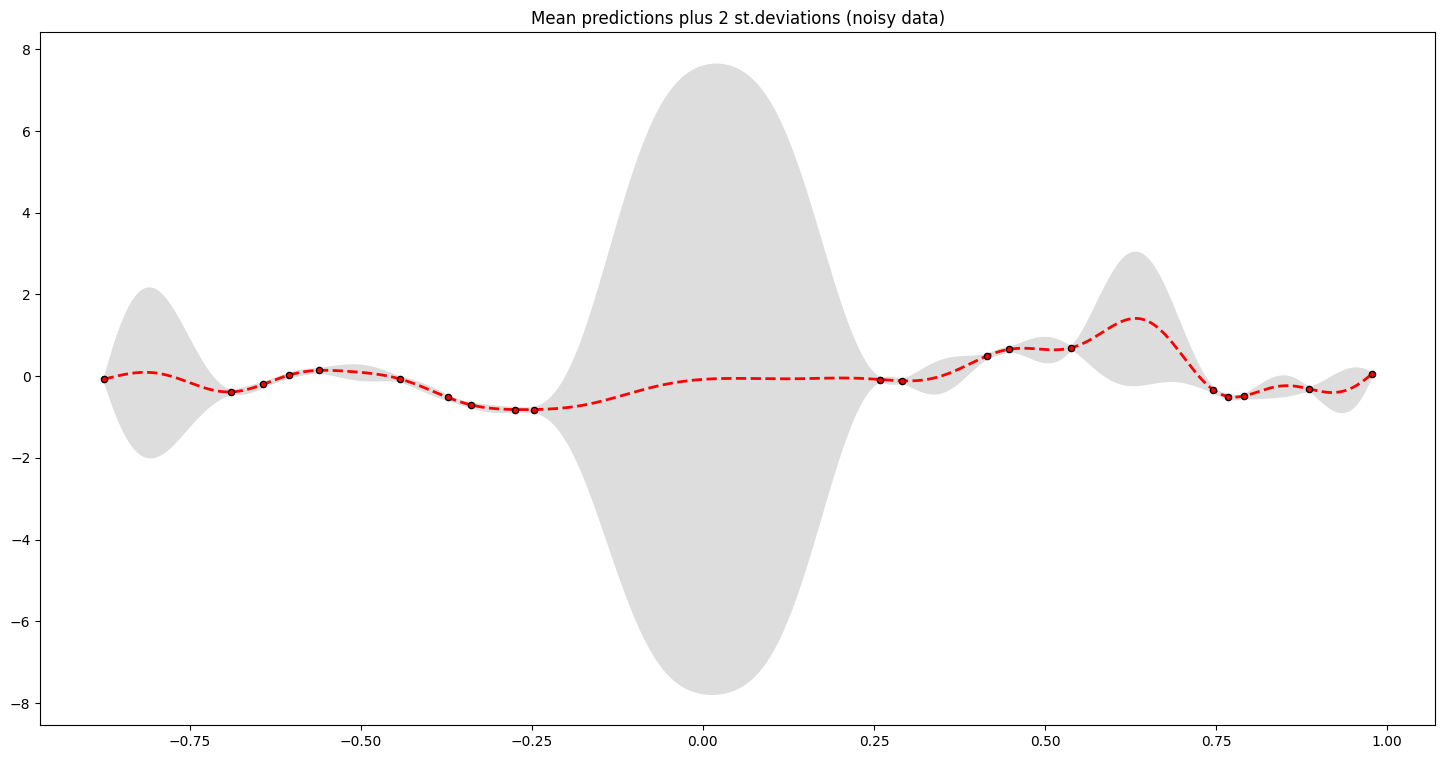

In [253]:
plt.figure(3)
plt.clf()
plt.figure(figsize=(18,9))
plt.scatter(xn, yn, c='r', s=20, zorder=10, edgecolors=(0, 0, 0))
plt.fill_between(X_pred.flat, (mu_n-1.96*stddev_n).flat, (mu_n+1.96*stddev_n).flat, color="#dddddd")
plt.plot(X_pred, mu_n, 'r--', lw=2)
plt.title('Mean predictions plus 2 st.deviations (noisy data)')
plt.show()

<Figure size 640x480 with 0 Axes>

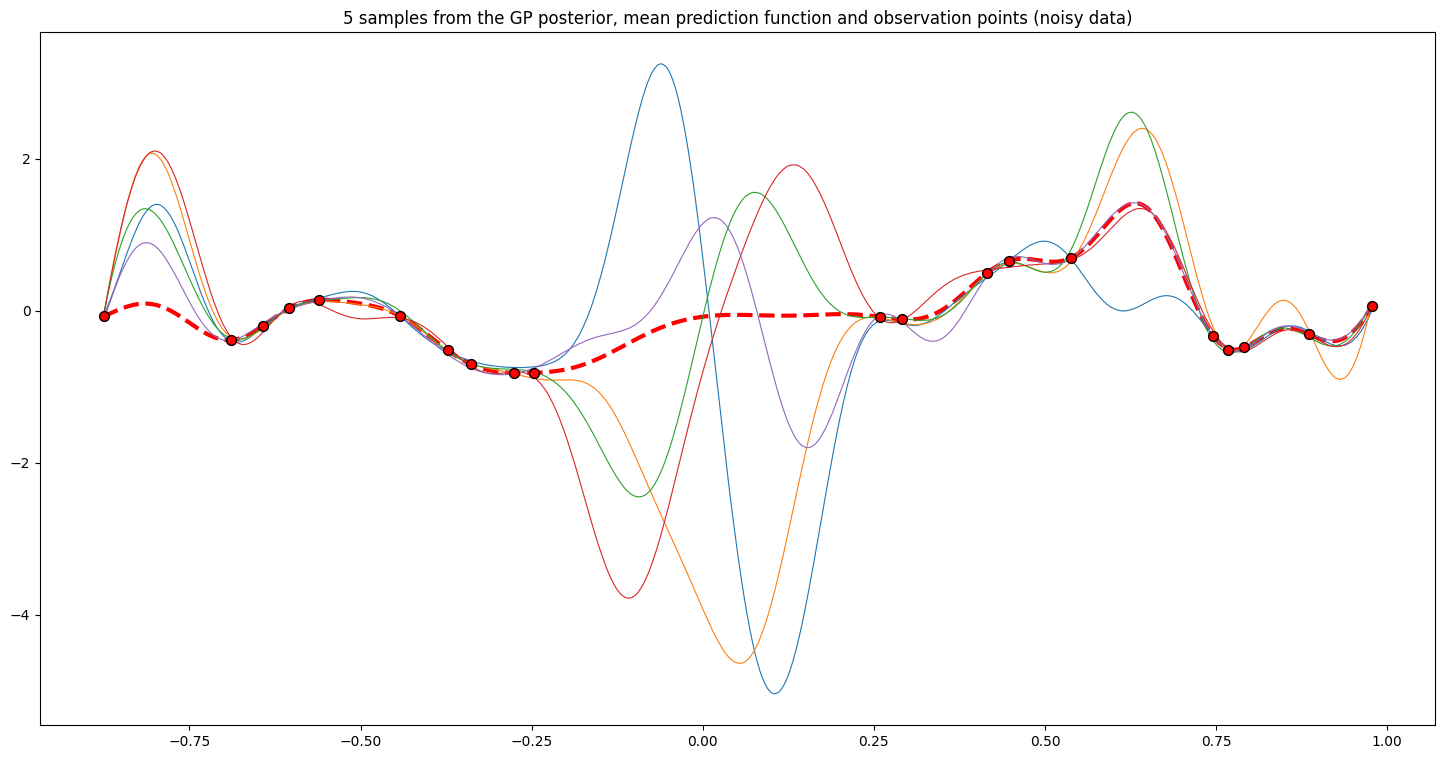

In [254]:
plt.figure(2)
plt.clf()
plt.figure(figsize=(18,9))
plt.scatter(xn, yn, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_pred, mu_n, 'r--', linewidth=3)
plt.plot(X_pred, f_post_n, linewidth=0.8)
plt.title('5 samples from the GP posterior, mean prediction function and observation points (noisy data)')
plt.show()